In [5]:
import pandas as pd
import os

In [6]:
ROOT = "/home/rjaikanth97/myspace/dissertation-final/dissertation/results/yolov8n/runs/pose"
results = []
for path in os.listdir(ROOT):
    df = pd.read_csv(os.path.join(ROOT, path, "results.csv"))
    df.columns = list(map(lambda x: x.strip(), df.columns))
    df['RUN'] = path
    results.append(df)
results = pd.concat(results)
results.loc[results['RUN'] == "YOLOv8N SGD (20-40 epochs)", "epoch"] = results.loc[results['RUN'] == "YOLOv8N SGD (20-40 epochs)", "epoch"].apply(lambda x: x + 20)

results.loc[results['RUN'] == "YOLOv8N SGD (40-50 epochs)", "epoch"] = results.loc[results['RUN'] == "YOLOv8N SGD (40-50 epochs)", "epoch"].apply(lambda x: x + 40)

results.reset_index(inplace=True, drop=True)
results = results.drop("RUN", axis=1).sort_values("epoch")
results

,epoch,train/box_loss,train/pose_loss,train/kobj_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),...,metrics/mAP50(P),metrics/mAP50-95(P),val/box_loss,val/pose_loss,val/kobj_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,0.75140,6.87050,0,0.47040,1.06500,0.99988,1.00000,0.99500,0.91396,...,0.44836,0.16078,0.43079,3.86830,0,0.24117,0.88836,0.003332,0.003332,0.003332
1,1,0.69984,4.60370,0,0.44169,1.03790,0.99947,1.00000,0.99500,0.90329,...,0.61951,0.27414,0.47377,3.57720,0,0.25519,0.90302,0.006336,0.006336,0.006336
2,2,0.74509,4.55130,0,0.46926,1.04680,0.99930,0.99989,0.99500,0.90184,...,0.68260,0.24945,0.46508,3.54940,0,0.25837,0.91282,0.009009,0.009009,0.009009
3,3,0.74477,4.43950,0,0.45536,1.04100,0.99924,0.99989,0.99500,0.92476,...,0.79408,0.32029,0.42577,3.40370,0,0.23604,0.88715,0.008515,0.008515,0.008515
4,4,0.68957,4.18890,0,0.41823,1.01460,0.99984,1.00000,0.99500,0.93996,...,0.87018,0.31752,0.38362,3.09160,0,0.21389,0.86606,0.008515,0.008515,0.008515
5,5,0.64926,3.95200,0,0.39056,0.99767,0.99996,1.00000,0.99500,0.94872,...,0.88832,0.33841,0.35175,3.02690,0,0.19475,0.84853,0.008020,0.008020,0.008020
6,6,0.61669,3.81150,0,0.36796,0.98272,0.99989,0.99997,0.99500,0.95386,...,0.91696,0.34540,0.33362,2.96360,0,0.18300,0.84234,0.007525,0.007525,0.007525
7,7,0.59578,3.73270,0,0.35645,0.97519,0.99988,1.00000,0.99500,0.95941,...,0.93177,0.38472,0.32781,2.92270,0,0.17998,0.83994,0.007030,0.007030,0.007030
8,8,0.57820,3.68520,0,0.34499,0.97122,0.99994,1.00000,0.99500,0.96531,...,0.94648,0.39443,0.31231,2.90490,0,0.17024,0.83197,0.006535,0.006535,0.006535
9,9,0.55974,3.60030,0,0.33242,0.96136,0.99995,1.00000,0.99500,0.96731,...,0.94610,0.39979,0.30150,2.87390,0,0.16482,0.82688,0.006040,0.006040,0.006040


In [7]:
x = results['epoch']
y_dict = {
    'train/box_loss'      : 'min',
    'train/pose_loss'     : 'min',
    'train/kobj_loss'     : 'min',
    'train/cls_loss'      : 'min',
    'train/dfl_loss'      : 'min',
    'metrics/precision(B)': 'max',
    'metrics/recall(B)'   : 'max',
    'metrics/mAP50(B)'    : 'max',
    'metrics/mAP50-95(B)' : 'max',
    'metrics/precision(P)': 'max',
    'metrics/recall(P)'   : 'max',
    'metrics/mAP50(P)'    : 'max',
    'metrics/mAP50-95(P)' : 'max',
    'val/box_loss'        : 'min',
    'val/pose_loss'       : 'min',
    'val/kobj_loss'       : 'min',
    'val/cls_loss'        : 'min',
    'val/dfl_loss'        : 'min'
}



In [9]:
import matplotlib.pyplot as plt
import numpy as np


x = results['epoch'].values
y = results['train/box_loss'].values

def highlight_point(x, y, ax, mm='max'):
    if mm == "max":
        xmax = x[np.argmax(y)]
        ymax = y.max()
        text= "Epoch {:02d}, Value {:.3f}".format(xmax, ymax)
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
        kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
        ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)
    else:
        xmin = x[np.argmin(y)]
        ymin = y.min()
        text= "Epoch {:02d}, Loss {:.3f}".format(xmin, ymin)
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
 40       kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
        ax.annotate(text, xy=(xmin, ymin), xytext=(0.94,0.96), **kw)

def plot_metrics(x, y, mm='max'):
    title = y
    y = results[y].values
    fig, ax = plt.subplots()
    ax.plot(x, y)
    highlight_point(x, y, ax, mm)

    plt.title(title)
    plt.savefig(f"../plots/yolov8n/{title.replace('/', ':')}.png", dpi=100)


for y, mm in y_dict.items():
    plot_metrics(x,y, mm)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 24)

In [10]:
import os
import  pandas as pd
ROOT = "/home/rjaikanth97/myspace/dissertation-final/dissertation/results/yolov8x"
import glob

results = []

for df in glob.glob(f"{ROOT}/**/*.csv", recursive = True):
    run_id = os.path.basename(os.path.dirname(df))
    df = pd.read_csv(df)
    df.columns = list(map(lambda x: x.strip(), df.columns))
    df['RUN'] = run_id
    results.append(df)

results = pd.concat(results)
results = results.drop_duplicates()
results.loc[results['RUN'] == "YOLOv8X SGD (10-15 epochs)", "epoch"] = results.loc[results['RUN'] == "YOLOv8X SGD (10-15 epochs)", "epoch"].apply(lambda x: x + 10)
results.loc[results['RUN'] == "YOLOv8X SGD (15-20 epochs)", "epoch"] = results.loc[results['RUN'] == "YOLOv8X SGD (15-20 epochs)", "epoch"].apply(lambda x: x + 15)




# fig, ax = plt.subplots()
# ax.plot(results['epoch'], results['train/box_loss'])
# plt.show()
# results[['epoch', 'train/box_loss']]
results = results.sort_values('epoch')
results.reset_index(inplace=True, drop=True)

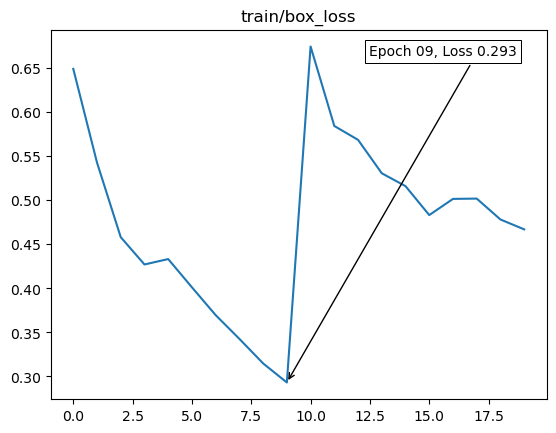

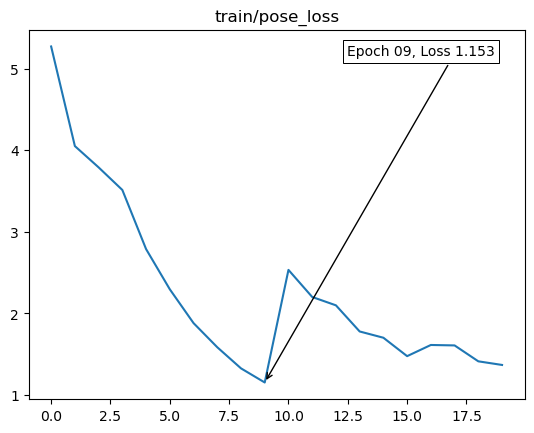

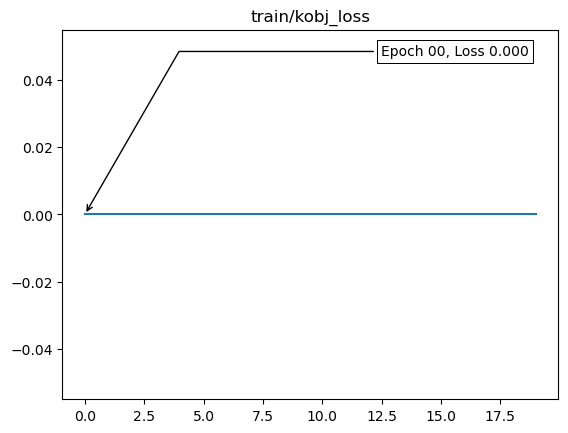

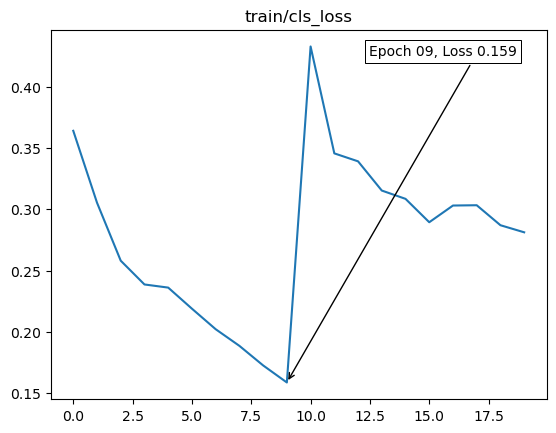

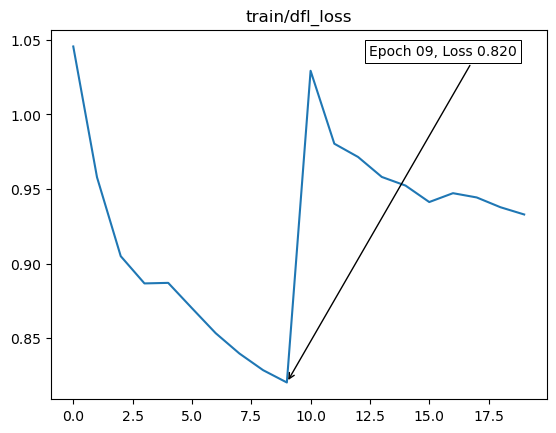

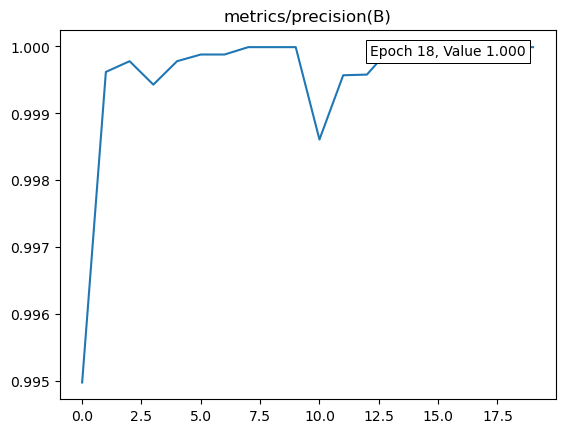

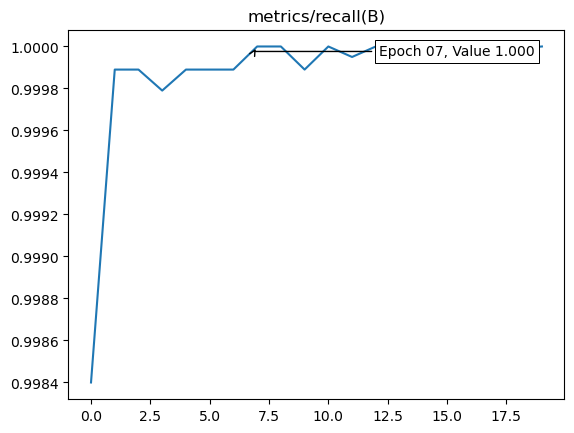

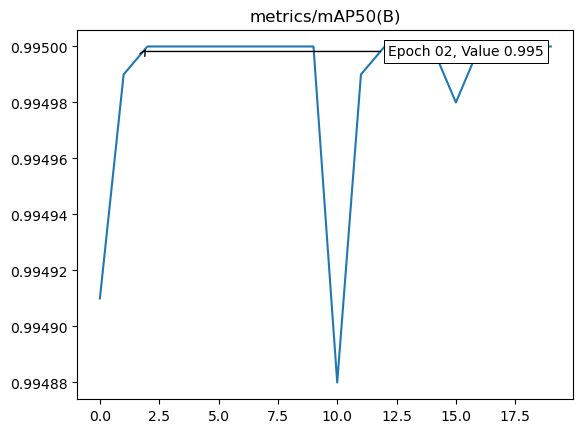

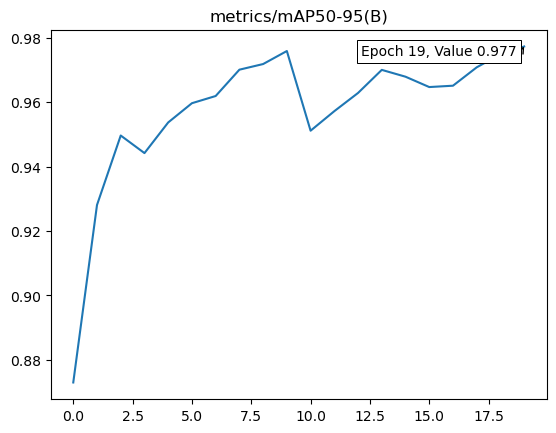

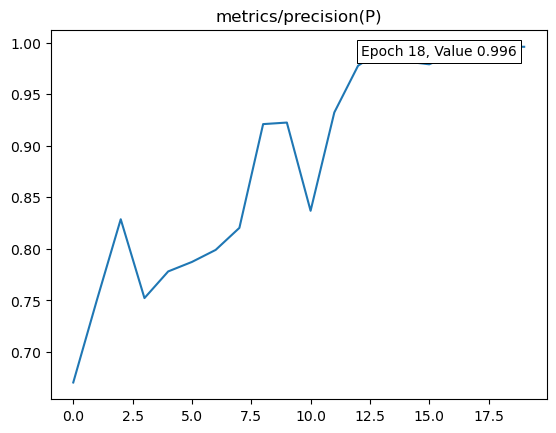

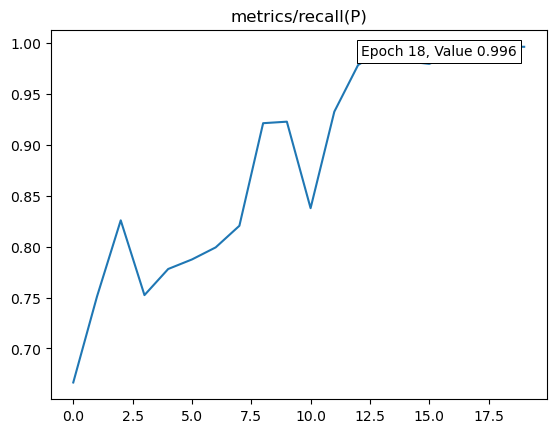

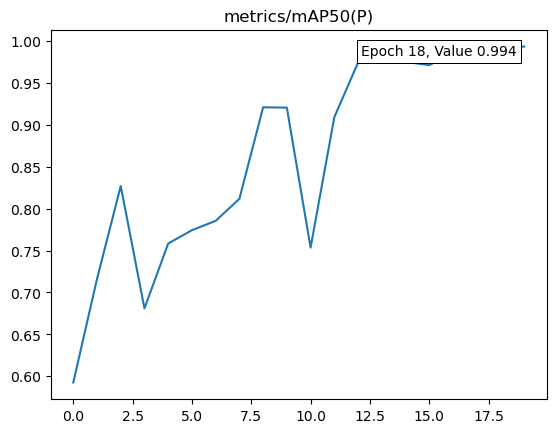

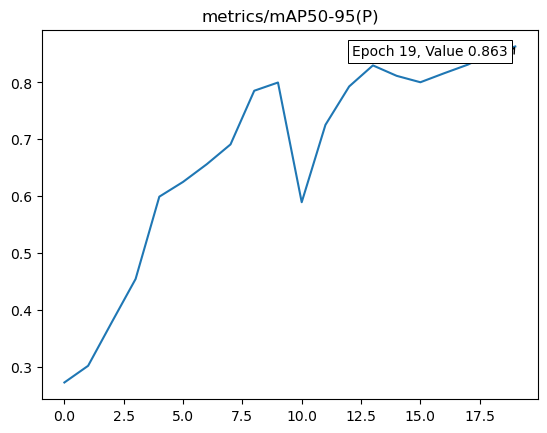

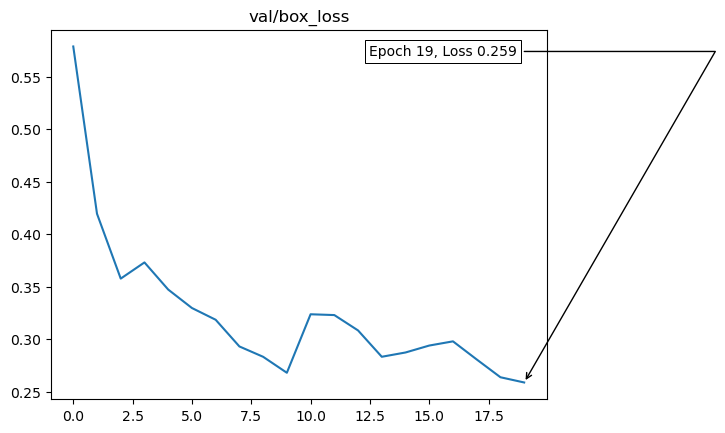

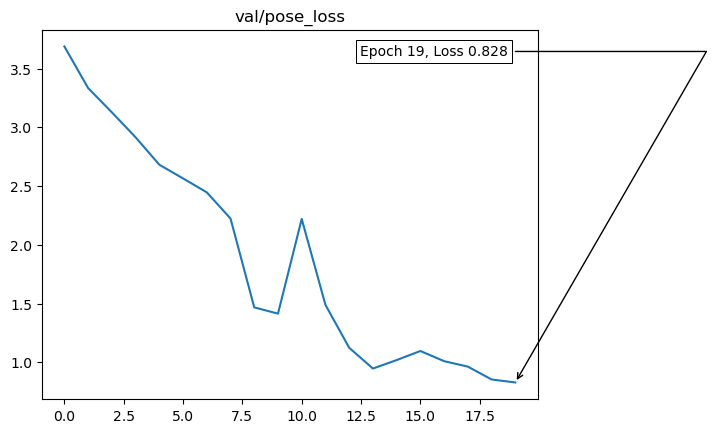

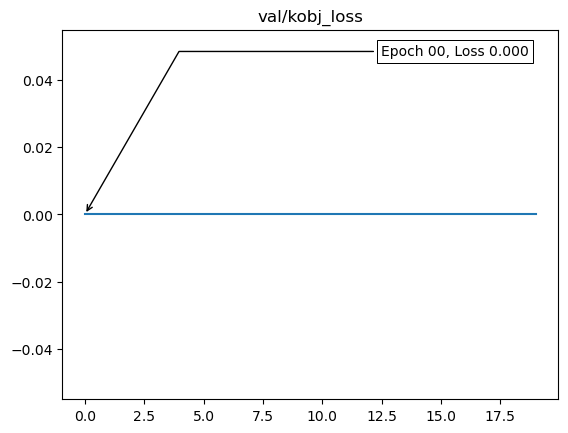

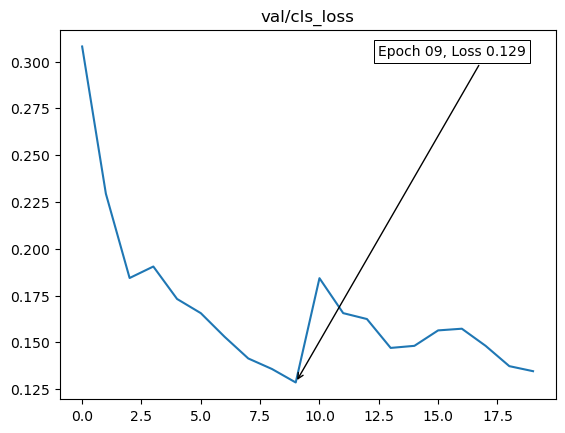

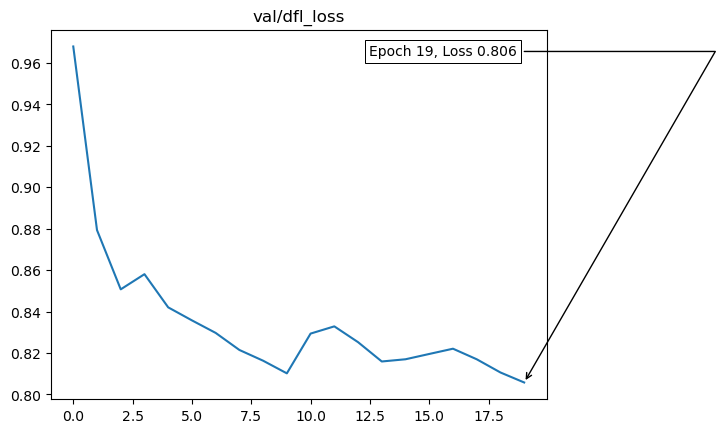

In [11]:
import matplotlib.pyplot as plt
import numpy as np


x = results['epoch'].values

def highlight_point(x, y, ax, mm='max'):
    if mm == "max":
        xmax = x[np.argmax(y)]
        ymax = y.max()
        text= "Epoch {:02d}, Value {:.3f}".format(xmax, ymax)
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
        kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
        ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)
    else:
        xmin = x[np.argmin(y)]
        ymin = y.min()
        text= "Epoch {:02d}, Loss {:.3f}".format(xmin, ymin)
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
        kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
        ax.annotate(text, xy=(xmin, ymin), xytext=(0.94,0.96), **kw)

def plot_metrics(x, y, mm='max'):
    title = y
    y = results[y].values
    fig, ax = plt.subplots()
    ax.plot(x, y)
    highlight_point(x, y, ax, mm)

    plt.title(title)
    plt.savefig(f"../plots/yolov8x/{title.replace('/', ':')}.png", dpi=100)


for y, mm in y_dict.items():
    plot_metrics(x,y, mm)


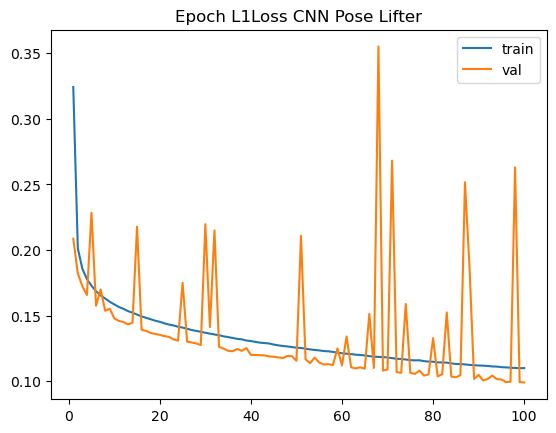

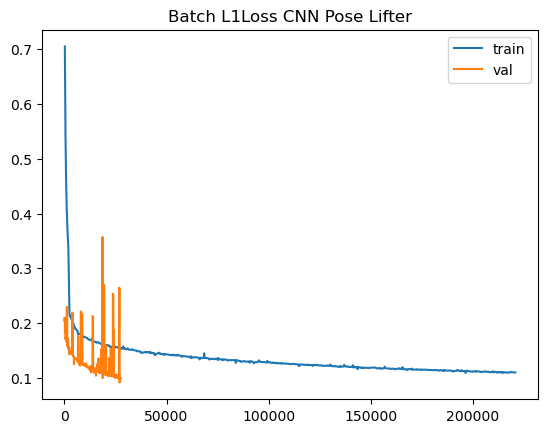

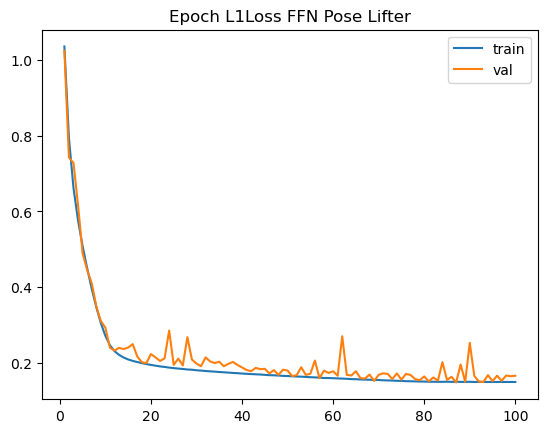

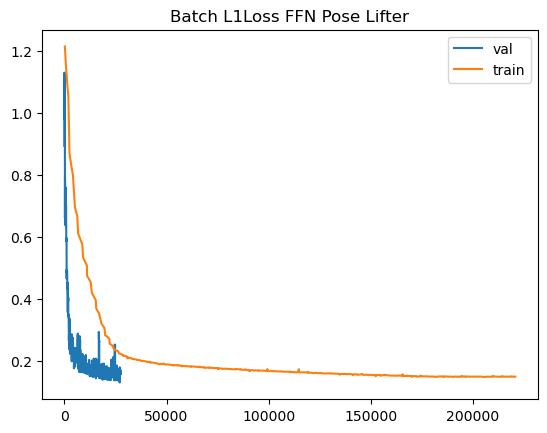

In [31]:
ROOT = "/home/rjaikanth97/myspace/dissertation-final/dissertation/results/lifting"

cnn_epoch = [x for x in glob.glob(f"{ROOT}/*.csv") if "CNN" in x and "epoch" in x]
cnn_mbatch = [x for x in glob.glob(f"{ROOT}/*.csv") if "CNN" in x and "epoch" not in x]


fig, ax = plt.subplots()
for f in cnn_epoch:
    df = pd.read_csv(f)
    x = df['Step'].values
    y = df['Value'].values
    ax.plot(x, y, label = "train" if "train" in f else "val")

plt.title("Epoch L1Loss CNN Pose Lifter")
plt.legend()
plt.savefig("../plots/lifting/cnn_epoch.png", dpi=100)


fig, ax = plt.subplots()
for f in cnn_mbatch:
    df = pd.read_csv(f)
    x = df['Step'].values
    y = df['Value'].values
    ax.plot(x, y, label = "train" if "train" in f else "val")

plt.title("Batch L1Loss CNN Pose Lifter")
plt.legend()
plt.savefig("../plots/lifting/cnn_mbatch.png", dpi=100)



ffn_epoch = [x for x in glob.glob(f"{ROOT}/*.csv") if "FFN" in x and "epoch" in x]
ffn_mbatch = [x for x in glob.glob(f"{ROOT}/*.csv") if "FFN" in x and "epoch" not in x]

fig, ax = plt.subplots()
for f in ffn_epoch:
    df = pd.read_csv(f)
    x = df['Step'].values
    y = df['Value'].values
    ax.plot(x, y, label = "train" if "train" in f else "val")

plt.title("Epoch L1Loss FFN Pose Lifter")
plt.legend()
plt.savefig("../plots/lifting/ffn_epoch.png", dpi=100)

fig, ax = plt.subplots()
for f in ffn_mbatch:
    df = pd.read_csv(f)
    x = df['Step'].values
    y = df['Value'].values
    ax.plot(x, y, label = "train" if "train" in f else "val")

plt.title("Batch L1Loss FFN Pose Lifter")
plt.legend()
plt.savefig("../plots/lifting/ffn_mbatch.png", dpi=100)